In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Load the image
image_path = 'WhatsApp Image 2024-11-02 at 13.52.14_94a9a446.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

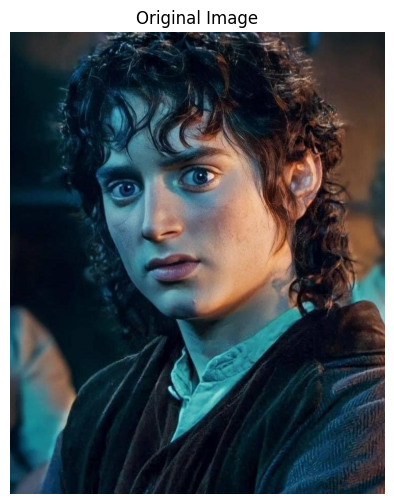

In [10]:
# Function to display images
def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()
display_image(image_rgb, "Original Image")

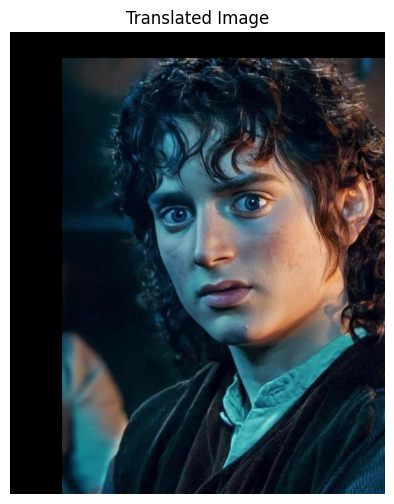

In [11]:
# 1. Translation
translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (image.shape[1], image.shape[0]))
display_image(translated_image, "Translated Image")

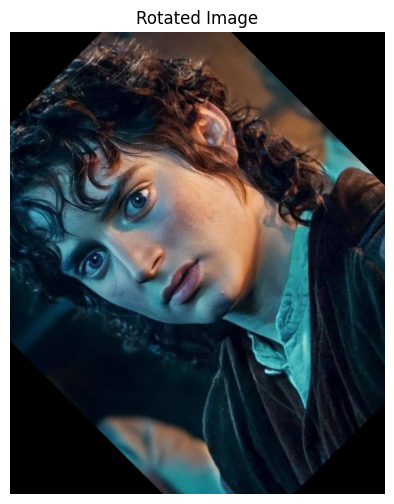

In [12]:
# 2. Rotation 
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (w, h))
display_image(rotated_image, "Rotated Image")

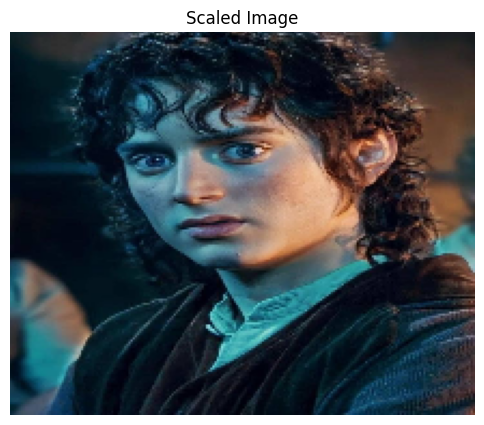

In [13]:
# 3. Scaling 
scaled_image = cv2.resize(image_rgb, None, fx=0.3, fy=0.2, interpolation=cv2.INTER_LINEAR)
display_image(scaled_image, "Scaled Image")

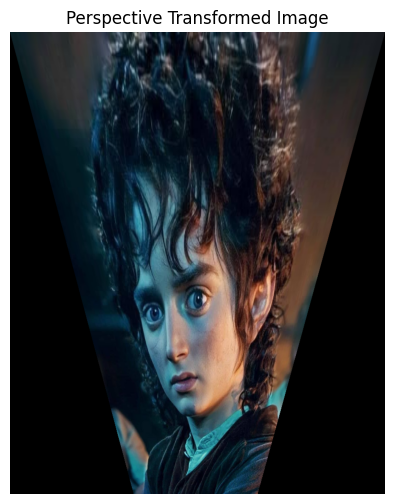

In [14]:
# 4. Perspective Transformation
pts1 = np.float32([[0, 0], [w - 1, 0], [0, h - 1], [w - 1, h - 1]])
pts2 = np.float32([[0, 0], [w - 1, 0], [int(0.33 * w), h - 1], [int(0.66 * w), h - 1]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_image = cv2.warpPerspective(image_rgb, perspective_matrix, (w, h))
display_image(perspective_image, "Perspective Transformed Image")